In [69]:
import pandas as pd

data = {'x':  ['4', '8', '15','24','24','12','3'],
        'y':  ['4', '4', '8' , '4', '12','2','20']
        }

df = pd.DataFrame(data)

print (df)

    x   y
0   4   4
1   8   4
2  15   8
3  24   4
4  24  12
5  12   2
6   3  20


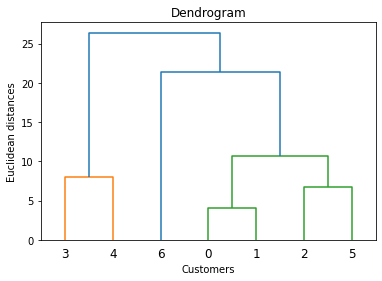

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#2 Importing the Mall_Customers dataset by pandas
#X = scaled_dataframe.values
X = df.values

#3 Using the dendrogram to find the optimal numbers of clusters. 
# First thing we're going to do is to import scipy library. scipy is #an open source Python library that contains tools to do #hierarchical clustering and building dendrograms. Only import the #needed tool.
import scipy.cluster.hierarchy as sch
#Lets create a dendrogram variable linkage is actually the algorithm #itself of hierarchical clustering and then in linkage we have to #specify on which data we apply and engage. This is X dataset
dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()


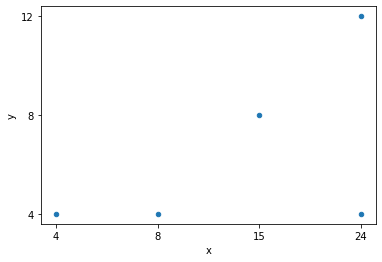

In [ ]:
df.plot(x='x', y='y', kind='scatter')	

In [ ]:
# def printPairs(arr, n):
#     pairs_point=[]
#     # Nested loop for all possible pairs
#     for i in range(n):
#         for j in range(n):
#             if i!=j:
#               point=[]
#               point.append(arr[i])
#               point.append(arr[j])
#               pairs_point.append(point)
#               #print("(",arr[i],",",arr[j],")",end=", ")
    
#     return pairs_point
           


# # Create a list in a range of 10-20
# pair_list = list(range(0, len(df)))

# # Print the list
# n = len(df)


# print(pair_list)

 
# a= printPairs(pair_list, n)
# print(len(a))

In [ ]:
import itertools

N = 5
numbers = list(range(N))

result = []
for i in range(2, N+1):
    result.extend(itertools.combinations(numbers, i))


result

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 3),
 (2, 4),
 (3, 4),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 4),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 4),
 (2, 3, 4),
 (0, 1, 2, 3),
 (0, 1, 2, 4),
 (0, 1, 3, 4),
 (0, 2, 3, 4),
 (1, 2, 3, 4),
 (0, 1, 2, 3, 4)]

In [ ]:
first_cluster=result[:10]
first_cluster

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 3),
 (2, 4),
 (3, 4)]

In [ ]:
MSE_1 = []

for i in first_cluster:
  x1 = int(df['x'].loc[i[0]])
  x2 = int(df['x'].loc[i[1]])
  y1 = int(df['y'].loc[i[0]])
  y2 = int(df['y'].loc[i[1]])

  x = ( x1 + x2 )/2
  y = ( y1 + y2 )/2
  sqr_err = pow((x - x1),2) + pow((y - y1),2) +pow((x - x2),2) + pow((y- y2),2)
  MSE_1.append(sqr_err)
  print(sqr_err)
print('-'*20)
print('MIN MSE: ' , min(MSE_1))
index_min = min(range(len(MSE_1)), key=MSE_1.__getitem__)
print('INDEX MIN MSE: ', index_min)
print(first_cluster[index_min])
cluster_1 = first_cluster[index_min]

8.0
68.5
200.0
232.0
32.5
128.0
160.0
48.5
48.5
32.0
--------------------
MIN MSE:  8.0
INDEX MIN MSE:  0
(0, 1)


In [ ]:
import itertools

N = 5
numbers = list(range(2,N))

result = []
for i in range(1, N):
    result.extend(itertools.combinations(numbers, i))
new_cluster=[]

second_cluster = result[:6] 

for i in range(0, N): 
  if len(second_cluster[i])==1:
    new_cluster.append(cluster_1 + second_cluster[i])

print(new_cluster)

[(0, 1, 2), (0, 1, 3), (0, 1, 4)]


In [ ]:
# MSE = []

# for i in new_cluster:
#   x1 = int(df['x'].loc[i[0]])
#   x2 = int(df['x'].loc[i[1]])
#   x3 = int(df['x'].loc[i[2]])
#   y1 = int(df['y'].loc[i[0]])
#   y2 = int(df['y'].loc[i[1]])
#   y3 = int(df['y'].loc[i[2]])
#   x = ( x1 + x2 + x3)/3
#   y = ( y1 + y2 + y3)/3
#   print(x)
#   print(y)
#   sqr_err = pow((x - x1),2) + pow((y - y1),2) + pow((x - x2),2) + pow((y- y2),2) + pow((x - x3),2) + pow((y- y3),2) 
#   MSE.append(sqr_err)
# print(sqr_err)
# print('-'*20)
# print('MSE: ', MSE)
# print('MIN MSE: ' , min(MSE))
# index_min = min(range(len(MSE)), key=MSE.__getitem__)
# print('INDEX MIN MSE: ', index_min)
 # print(first_cluster[index_min])

In [ ]:
import itertools

N = 5
numbers = list(range(N))

result_total = []
for i in range(2, N+1):
    result_total.extend(itertools.combinations(numbers, i))


result_total

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 3),
 (2, 4),
 (3, 4),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 4),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 4),
 (2, 3, 4),
 (0, 1, 2, 3),
 (0, 1, 2, 4),
 (0, 1, 3, 4),
 (0, 2, 3, 4),
 (1, 2, 3, 4),
 (0, 1, 2, 3, 4)]

In [ ]:
#result=result[:-6]
print(result[:10])

#result=result[10:-6]
result=result_total[:10]

[(2,), (3,), (4,), (2, 3), (2, 4), (3, 4), (2, 3, 4)]


In [ ]:
#N = 3
#numbers = list(range(N))
#numbers

def midPoint(groups,df):
  sumx=0
  sumy=0
  #mi serve per capire quanti punti appartengono in un gruppo
  l=len(groups)

  for i in range(l):
    midpoint=[]

    se=[]
    # groups[i] mi indica l'indice associato ai punti in df, dunque salvo in xi e yi le coordinate effettive dei punti di df
    xi = int(df['x'].loc[groups[i]])
    yi = int(df['y'].loc[groups[i]])
  
    #effettuo la somma delle x di tutte le coordinate appartenenti al gruppo
    sumx = sumx + xi
    sumy = sumy + yi

  #formula punto medio
  x = round( sumx / l, 2)
  y = round( sumy /l, 2)
  
  #salvo tutti i punti medi in una lista midpoint
  midpoint.extend([x, y])
  #print('CLUSTER: [', groups ,'] ---> (', df.loc[groups[0]][0],',', df.loc[groups[0]][1], ')(', df.loc[groups[1]][0],',', df.loc[groups[1]][1], ')(', df.loc[groups[2]][0],',', df.loc[groups[2]][1], ') ---->  MIDPOINT: (',x,',',y,')')
  return midpoint 

# def squared_error(groups,df,midpoint):
#   sumx=0
#   sumy=0
#   l=len(groups)
#   print(l)
#   for i in range(l):
#     midpoint=[]
#     xi = int(df['x'].loc[groups[i]])
#     yi = int(df['y'].loc[groups[i]])
 


midpoint_list=[]
#Result = doppiette/triplette/ecc di punti in cui verrà calcolato il punto medio

#Scorro tutti i gruppi di punti
for i in range(len(result)):

  points=result[i] #seleziono un gruppo di punti alla volta

  #passo alla funzione un singolo gruppo di punti(rappresentano gli indici dei punti in df)
  #df = coordinate dei punti
  midpoint_list.append(midPoint(points,df))

print(midpoint_list)



[[6.0, 4.0], [9.5, 6.0], [14.0, 4.0], [14.0, 8.0], [11.5, 6.0], [16.0, 4.0], [16.0, 8.0], [19.5, 6.0], [19.5, 10.0], [24.0, 8.0]]


In [ ]:
#N = 3
#numbers = list(range(N))
#numbers

def midPoint(groups,df):
  
  midpoint_list=[]
  
  se=[]
  #scorro la lista di gruppi ottenuti
  for j in range(len(result)):
    
    #gruppo singolo es: (0,1) o (0,1,2)
    groups=result[j]
    sumx=0
    sumy=0
    #l = quanti punti appartengono in un gruppo
    l=len(groups)
    midpoint=[]
    for i in range(l):
      # groups[i] mi indica l'indice associato ai punti in df, dunque salvo in xi e yi le coordinate effettive dei punti di df
      xi = int(df['x'].loc[groups[i]])
      yi = int(df['y'].loc[groups[i]])
    
      #effettuo la somma delle x di tutte le coordinate appartenenti al gruppo
      sumx = sumx + xi
      sumy = sumy + yi

    #formula punto medio
    x = round( sumx / l, 2)
    y = round( sumy /l, 2)

    #salvo tutti i punti medi in una lista midpoint
    midpoint.extend([x, y])
    #print('CLUSTER: [', groups ,'] ---> (', df.loc[groups[0]][0],',', df.loc[groups[0]][1], ')(', df.loc[groups[1]][0],',', df.loc[groups[1]][1], ')(', df.loc[groups[2]][0],',', df.loc[groups[2]][1], ') ---->  MIDPOINT: (',x,',',y,')')
    midpoint_list.append(midpoint)

    ####################
    squared_error=0
    for i in range(l):
      xi = int(df['x'].loc[groups[i]])
      yi = int(df['y'].loc[groups[i]])
      squared_error = squared_error + pow((midpoint[0]-xi),2) + pow((midpoint[1]-yi),2)
      
    se.append(squared_error)
    #print(se)
    ####################
  return se

print(result_total)
print(midPoint(result_total,df))
min(midPoint(result,df))
index_min = min(range(len(midPoint(result,df))), key=midPoint(result,df).__getitem__)
print(result[index_min])

cluster_find=result[index_min]


In [67]:
import itertools

N = 5
numbers = list(range(N))

combinations = []
for i in range(2, N+1):
    combinations.extend(itertools.combinations(numbers, i))

#print(combinations)

#[(0,1)]
cluster_find=[(0,1)]
c_dim=4
cluster_total=[]
for i in range(len(cluster_find)): #scorrimento array dei cluster trovati
  
  cluster_temp=[]
  for j in combinations:  #scorrimento array delle combinazioni totali
    cont_out=0
    cont_in=0
    for k in range(len(j)):  #scorrimento valori dentro una singola combinazione
      # TODO: aggiungere controllo sulla dimensione del cluster  and len(j)==c_dim-1
      if len(j)==len(cluster_find[i]) and len(j)==c_dim-1 and j[k] not in cluster_find[i]:   #controllo se i valori dentro le combinazioni sono completamente diversi dai valori dei cluster
        cont_out=cont_out+1

      if len(j)>=c_dim-1  and len(j)<=c_dim and j[k] in cluster_find[i]: #controllo quali combinazioni contengono entrambi i valori del cluster 
        cont_in=cont_in+1


    if((cont_out==len(j) or cont_in==len(cluster_find[i]))and j!=cluster_find[i]): #creo una lista contenente tutti i papabili cluster
      cluster_temp.append(j)

  cluster_total.append(cluster_temp)
print(cluster_total)




[[(0, 1, 2), (0, 1, 3), (0, 1, 4), (0, 1, 2, 3), (0, 1, 2, 4), (0, 1, 3, 4)]]


In [36]:
for i in range(len(cluster_find)):
  #print(cluster_find[i])
  for j in range(len(cluster_total)):
    if i!=j:
      print('#########################')
      cont=0
      for k in range(len(cluster_total[j])):
        
        for w in range(len(cluster_find[i])):
          print(cluster_find[i][w],'-----',cluster_total[j][k])
          if cluster_find[i][w]==cluster_total[j][k]:
            print('eeee')
            print(cluster_total[j][k])
      

#########################
0 ----- (0, 3, 4)
1 ----- (0, 3, 4)
0 ----- (1, 3, 4)
1 ----- (1, 3, 4)
0 ----- (2, 3, 4)
1 ----- (2, 3, 4)
0 ----- (0, 1, 3, 4)
1 ----- (0, 1, 3, 4)
0 ----- (0, 2, 3, 4)
1 ----- (0, 2, 3, 4)
0 ----- (1, 2, 3, 4)
1 ----- (1, 2, 3, 4)
#########################
3 ----- (0, 1, 2)
4 ----- (0, 1, 2)
3 ----- (0, 1, 3)
4 ----- (0, 1, 3)
3 ----- (0, 1, 4)
4 ----- (0, 1, 4)
3 ----- (0, 1, 2, 3)
4 ----- (0, 1, 2, 3)
3 ----- (0, 1, 2, 4)
4 ----- (0, 1, 2, 4)
3 ----- (0, 1, 3, 4)
4 ----- (0, 1, 3, 4)


In [65]:
final_cluster=[]
for i in range(len(cluster_find)):
  print('a')
  for j in range(len(cluster_total)):
    for k in range(len(cluster_total[j])):
      foo = set(cluster_find[i]).intersection(set(cluster_total[j][k]))
      
      if i!=j and (len(foo)==0 or len(foo)==len(cluster_find[i])):
        print(cluster_find[i],'---',cluster_total[j][k],':  ',len(foo))
        final_cluster.append(cluster_total[j][k])

final_cluster = list(dict.fromkeys(final_cluster))
print(final_cluster)       


a
(0, 1) --- (2, 3, 4) :   0
(0, 1) --- (0, 1, 3, 4) :   2
a
(3, 4) --- (0, 1, 2) :   0
(3, 4) --- (0, 1, 3, 4) :   2
[(2, 3, 4), (0, 1, 3, 4), (0, 1, 2)]


In [ ]:
A = {1, 2, 3}
B = {1, 2, 3, 4, 5}

# all items of A are present in B
print(A.issubset(B))
print(type(A))